<a href="https://colab.research.google.com/github/jeyakumar-nanc/ArtificalIntelligence/blob/main/CS670_ProbabilityAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from seaborn.palettes import color_palette

**Problem 1a: (10 Points)**

The heights of adult men in the United States are approximately normally distributed with a mean of 70 inches and a standard deviation of 3 inches. Heights of adult women are approximately normally distributed with a mean of 64.5 inches and a standard deviation of 2.5 inches.

Graph the two distributions from 0 to 100 inches using the plotting framework of your choice ( Matplotlib, Seaborn etc.)

Text(0.5, 1.0, 'Normal Distribution of Adult men and women')

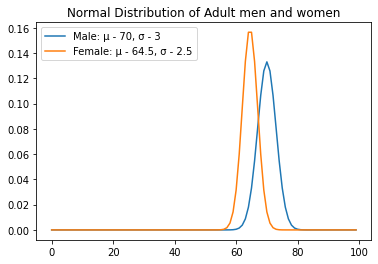

In [75]:
n = np.arange(0, 100)
norm = stats.norm.pdf(n, loc=70, scale=3)
plt.plot(n, norm,label='Male: μ - 70, σ - 3')
norm = stats.norm.pdf(n, loc=64.5, scale=2.5)
plt.plot(n, norm,label='Female: μ - 64.5, σ - 2.5')
plt.legend()
plt.title("Normal Distribution of Adult men and women")

**Problem 1b: (10 Points)**

What is the probability that a female is between the heights of 65 inches and 70 inches? What is the probability that a female is between the heights of 65 inches and 70 inches given that they are at least 60 inches tall ( You can use 100 as the upper limit of the distribution )?

(Hint: This is a probability assignment, not a calculus assignment. You do not need to calculate any integrals, just show the steps that you would take and the final result)

Using Z-score to compute probability.. Z = X - mean / std dev


at X= 65 , Z = 65 - 64.5 / 2.5 = 0.2
at X= 70 , Z = 70 - 64.5 / 2.5 = 2.2

P(65 < X < 70 ) = P (0.2 < Z < 2.2) => 0.9861 - 0.5793 => 0.4068


In [76]:
print("Probability that a female is between the heights of 65 inches and 70 inches is  40.68%")

Probability that a female is between the heights of 65 inches and 70 inches is  40.68%


at X= 65 , Z = 65 - 64.5 / 2.5 = 0.2
at X= 70 , Z = 70 - 64.5 / 2.5 = 2.2
at X= 60 , Z = 60 - 64.5 / 2.5 = -1.8

P(X > 60  = 1 - P(X <= 60) => 1 - 0.0359 = 0.9641

P(65 < X < 70 | X > 60 ) = 0.4068 / 0.9641 = 0.4219

In [77]:
print("Probability that a female is between the heights of 65 inches and 70, give that they are at least 60 inches tall inches is  42.19%")

Probability that a female is between the heights of 65 inches and 70, give that they are at least 60 inches tall inches is  42.19%


**Problem 1c: (20 Points)**

Lets say you conduct an experiment with a 100 trials where you measure a random man's height. Lets say the measurement that you take is always rounded down to an integer

( ie. both a person with a height of 75.2 inches and a person of height 75.8 inches would be recorded as 75 inches thus making the distribution a discrete distribution instead of continuous).

What do you expect the count of men with a height of 70 inches to be? What type of distribution do you expect it to be?

( You do not need to answer these questions, it is simply something to think about to aid you with the next part )

Calculate the probability distribution function of the "counts" of people out of 100 with a height of 70 inches.

( Hint: You will have to find the categorical probability that a man is of height 70 )

Simulate the experiment 1000 times to show the relationship on a plot. What is the relationship between number of times the experiment is run and how close it is to the true distribution

( Hint: numpy has many functions that can allow you to simulate distribution functions )

Text(0.5, 1.0, 'probability for counts of height 70 with 1000 trials')

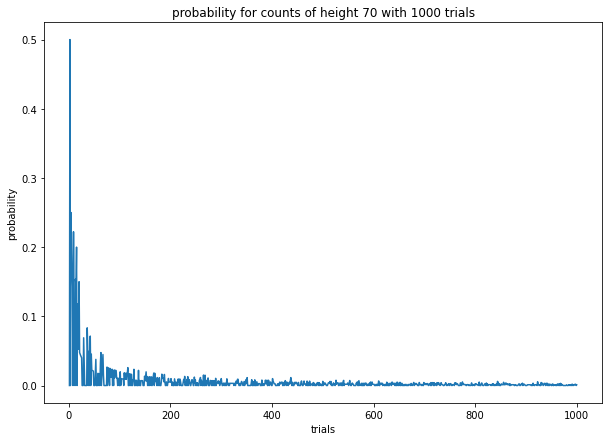

In [78]:
n = 100
x = [*range(1,1000+1)]
y=[]
for n in x:
  result = np.random.multinomial(100,[1/100.]*100,size=1)  
  y.append(result[0][69]/n)  


fig = plt.figure(figsize=(10,7))
ax=fig.add_subplot(111)
ax.plot(x,y)
ax.set_xlabel("trials")
ax.set_ylabel('probability')
ax.set_title('probability for counts of height 70 with 1000 trials')

**Problem 2a: (15 Points)**
Given the circuit below, the probability that any switch  is closed (current passes through ) is ? What is the probability that there is a signal at the output? Give your answer in terms of 


**Answer:**

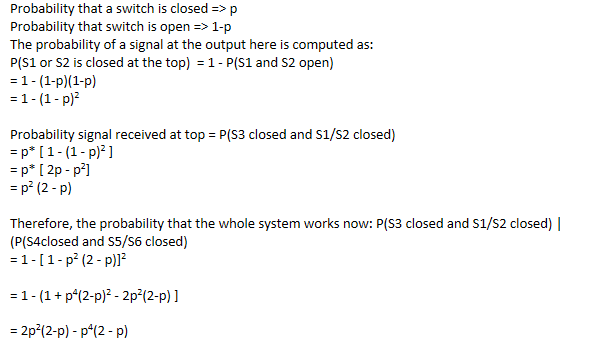

**Problem 2b: (15 Points)**
Given the same circuit above, if a signal is observed at the end, what is the probability that  is open ( no current going through ) . Give your answer in terms of.


**Answer:**

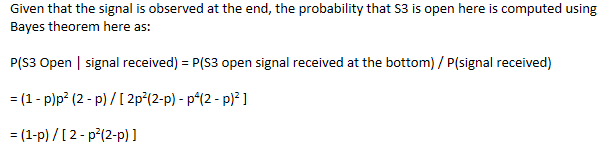

**Problem 3a (20 points)**
It follows that those with a larger height will be generally heavier than those with a smaller height. This is just a broad generalization and does not always apply. Here is a link to a data set that contains anonymous entries on peoples’ gender, height and weight. Download this dataset ( It is pretty small don’t worry ). You might need to make a Kaggle account. Kaggle is an online community of data scientists and has a large collection of open source datasets for many different purposes.

Familiarize yourself with the package pandas, as you can use it to easily unpack the csv into manipulatable datatypes. If you are using colab, which you most likely are, ensure that you have logged in with the university Google account.

Using the data find two values for covariance between height and weight. There should be one value for male and female.

In [85]:
import pandas as pd

In [86]:
df = pd.read_csv('/content/sample_data/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [87]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [88]:
def cov(X, Y):
    x_mean = np.mean(X)
    y_mean = np.mean(Y)
    cov_xy = np.mean((X-x_mean)*(Y-y_mean))
    return cov_xy

In [89]:
print("Covariance for male: ", cov(df[df['Gender']=='Male']['Height'], df[df['Gender']=='Male']['Weight']))

Covariance for male:  48.86987306199798


In [90]:
print("Covariance for female: ", cov(df[df['Gender']=='Female']['Height'], df[df['Gender']=='Female']['Weight']))

Covariance for female:  43.567688883770344


**Problem 3b: (10 points)**
Find the correlation between height and weight for Males and Females

In [91]:
def corr(X, Y):
    x_mean = np.mean(X)
    y_mean = np.mean(Y)
    x_var = np.mean((X-x_mean)**2)
    y_var = np.mean((Y-y_mean)**2)
    corr_xy = cov(X, Y) / x_var**0.5 / y_var**0.5
    return corr_xy

In [92]:
print("Correlation for male: ", corr(df[df['Gender']=='Male']['Height'], df[df['Gender']=='Male']['Weight']))

Correlation for male:  0.8629788486163136


In [93]:
print("Correlation for female: ", corr(df[df['Gender']=='Female']['Height'], df[df['Gender']=='Female']['Weight']))

Correlation for female:  0.849608591418601


**Extra credit: (5 points)**
Using matplotlib’s or seaborn’s 3D graphing functionality, create a wireframe graph of the multivariate probability distribution of heights and weights for either men or women ( You don’t have to do both ). Use the data and calculated values from problem 3 to solve this problem.

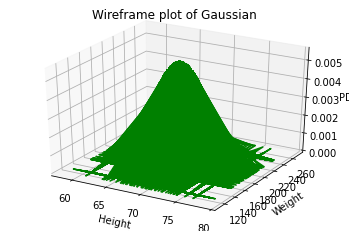

In [95]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal


_mean = [df[df['Gender']=='Male']["Height"].mean(), df[df['Gender']=='Male']["Weight"].mean()]

_cov = df.loc[df['Gender']=='Male'].cov()

X, Y = np.meshgrid(df[df['Gender']=='Male']['Height'], df[df['Gender']=='Male']['Weight'])

Z = multivariate_normal(mean=_mean,cov=_cov)

fig = plt.figure()
pdf = np.zeros(X.shape)
for i in range(X.shape[0]):
  for j in range(X.shape[1]):
    pdf[i,j] = Z.pdf([X[i,j], Y[i,j]])
ax = plt.axes(projection ='3d')
ax.plot_wireframe(X, Y, pdf, color ='green')
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_zlabel('PDF')
ax.set_title('Wireframe plot of Gaussian');
